## (a) Importing libraries

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from keras_tuner import RandomSearch
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score, precision_score, recall_score, f1_score
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import visualkeras
from keras.utils import plot_model
import pydotplus
import random
from tensorflow.keras import layers

## (b) Data loading and preparation

In [3]:
# load datasets
white_wine = pd.read_csv('winequality-white.csv', sep=';')
red_wine = pd.read_csv('winequality-red.csv', sep=';')

In [4]:
# assign labels
white_wine['type'] = 'white'
red_wine['type'] = 'red'

In [5]:
# merge datasets
wine = pd.concat([white_wine, red_wine])

In [6]:
# encode labels
wine['type'] = wine['type'].map({'white': 0, 'red': 1})

In [7]:
#remove duplicate values
wine.drop_duplicates(inplace=True)

In [8]:
#Identify the skewness and outliers
skewness = wine.skew()
Q1 = wine.quantile(0.25)
Q3 = wine.quantile(0.75)
IQR = Q3 - Q1
outliers = ((wine < (Q1 - 1.5 * IQR)) | (wine > (Q3 + 1.5 * IQR))).any(axis=1)

In [9]:
# Remove outliers
wine = wine[~outliers]

In [10]:
# split features and labels
X = wine.drop('type', axis=1)
y = wine['type']

In [11]:
# normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [12]:
# split into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [13]:
print(X_train)

[[-1.0695713  -1.11623515  1.58163642 ... -0.76946429 -0.68084633
   0.2688715 ]
 [ 2.93412666  0.86246159  0.37436845 ...  1.31052937  0.43771569
   0.2688715 ]
 [-0.06864681 -0.79964367  2.70267098 ...  0.70386455 -0.3366734
   0.2688715 ]
 ...
 [-0.62471597 -0.08731284  0.63306873 ... -1.2027963  -1.36919218
  -1.02202804]
 [ 0.26499468  2.52456686 -2.6438015  ...  0.61719815 -1.36919218
   0.2688715 ]
 [ 0.37620852 -0.24560858  0.5468353  ...  0.96386376  0.17958599
  -1.02202804]]


## (c) Model development

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                832       
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 897
Trainable params: 897
Non-trainable params: 0
_________________________________________________________________


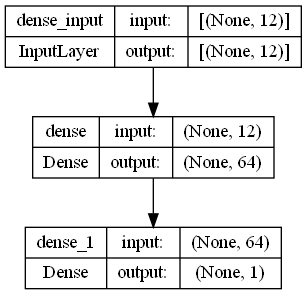

In [14]:
# Model 1
# Two dense layers (one hidden layer)
model1 = Sequential()
model1.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model1.add(Dense(1, activation='sigmoid'))

model1.summary()
plot_model(model1, to_file='model_architecture1.png', show_shapes=True)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                832       
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,945
Trainable params: 2,945
Non-trainable params: 0
_________________________________________________________________


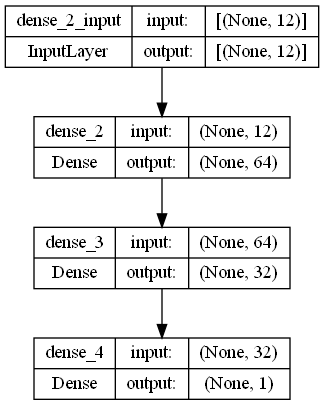

In [15]:
# Model 2
# Three dense layers (two hidden layers)
model2 = Sequential()
model2.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

model2.summary()
plot_model(model2, to_file='model_architecture2.png', show_shapes=True)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 64)                832       
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 7,105
Trainable params: 7,105
Non-trainable params: 0
_________________________________________________________________


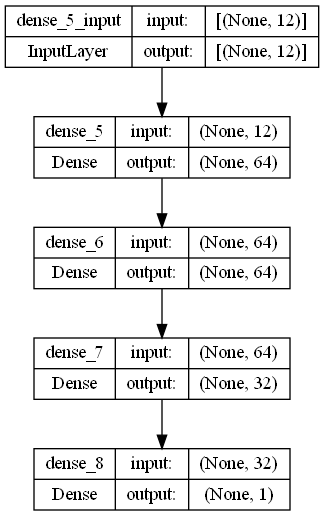

In [16]:
# Model 3
# Four dense layers (three hidden layers)
model3 = Sequential()
model3.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model3.add(Dense(64, activation='relu'))
model3.add(Dense(32, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))

model3.summary()
plot_model(model3, to_file='model_architecture3.png', show_shapes=True)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                832       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2,945
Trainable params: 2,945
Non-trainable params: 0
_________________________________________________________________


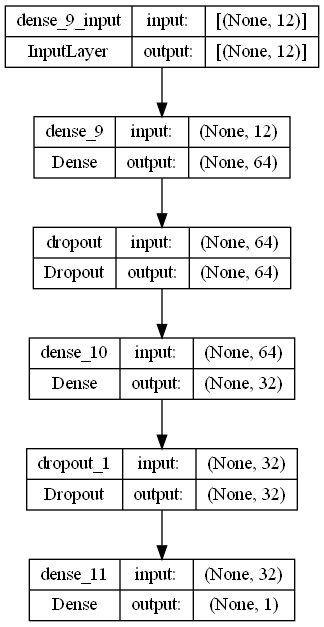

In [17]:
# Model 4
# Three dense layers with dropout
model4 = Sequential()
model4.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model4.add(Dropout(0.5))
model4.add(Dense(32, activation='relu'))
model4.add(Dropout(0.5))
model4.add(Dense(1, activation='sigmoid'))

model4.summary()
plot_model(model4, to_file='model_architecture4.png', show_shapes=True)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                832       
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 64)                4160      
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 64)               

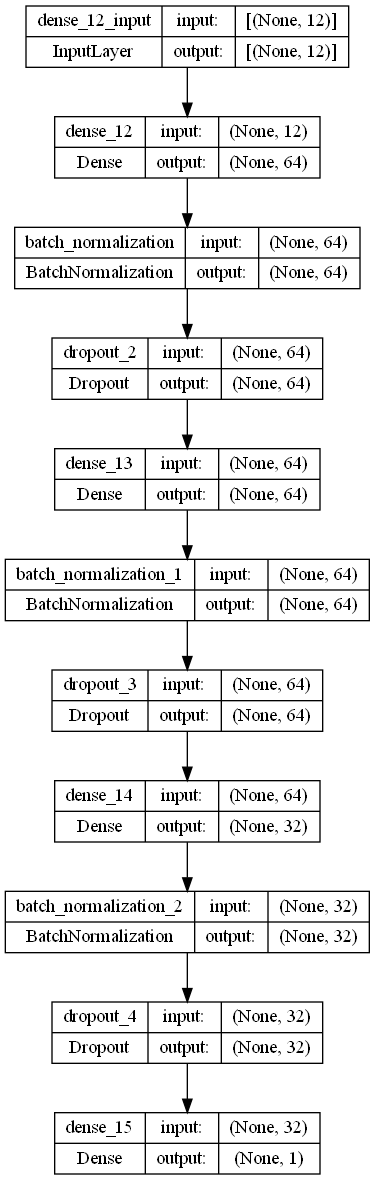

In [18]:
# Model 5
# Four dense layers with dropout and batch normalisation
model5 = Sequential()
model5.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model5.add(BatchNormalization())
model5.add(Dropout(0.5))
model5.add(Dense(64, activation='relu'))
model5.add(BatchNormalization())
model5.add(Dropout(0.5))
model5.add(Dense(32, activation='relu'))
model5.add(BatchNormalization())
model5.add(Dropout(0.5))
model5.add(Dense(1, activation='sigmoid'))

model5.summary()
plot_model(model5, to_file='model_architecture5.png', show_shapes=True)

Training model 1
Epoch 1/10
90/90 [==============================] - 3s 9ms/step - loss: 0.3182 - accuracy: 0.9366 - val_loss: 0.1527 - val_accuracy: 0.9820
Epoch 2/10
90/90 [==============================] - 0s 4ms/step - loss: 0.1041 - accuracy: 0.9905 - val_loss: 0.0757 - val_accuracy: 0.9902
Epoch 3/10
90/90 [==============================] - 0s 5ms/step - loss: 0.0597 - accuracy: 0.9919 - val_loss: 0.0508 - val_accuracy: 0.9935
Epoch 4/10
90/90 [==============================] - 0s 4ms/step - loss: 0.0435 - accuracy: 0.9930 - val_loss: 0.0396 - val_accuracy: 0.9951
Epoch 5/10
90/90 [==============================] - 0s 3ms/step - loss: 0.0358 - accuracy: 0.9930 - val_loss: 0.0340 - val_accuracy: 0.9951
Epoch 6/10
90/90 [==============================] - 0s 3ms/step - loss: 0.0314 - accuracy: 0.9937 - val_loss: 0.0300 - val_accuracy: 0.9967
Epoch 7/10
90/90 [==============================] - 0s 4ms/step - loss: 0.0286 - accuracy: 0.9944 - val_loss: 0.0277 - val_accuracy: 0.9967
Epo

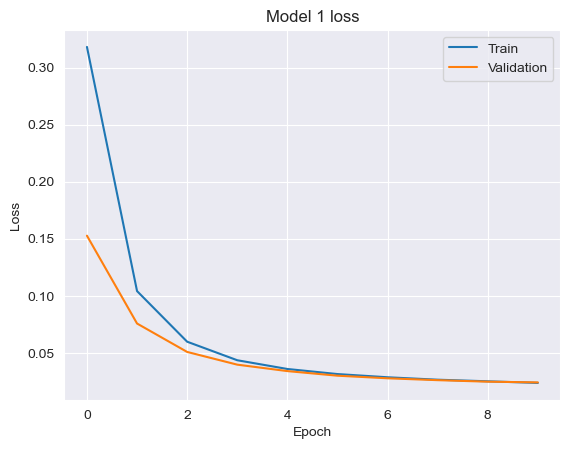

Training model 2
Epoch 1/10
90/90 [==============================] - 1s 5ms/step - loss: 0.2545 - accuracy: 0.9450 - val_loss: 0.0722 - val_accuracy: 0.9918
Epoch 2/10
90/90 [==============================] - 0s 3ms/step - loss: 0.0477 - accuracy: 0.9923 - val_loss: 0.0345 - val_accuracy: 0.9951
Epoch 3/10
90/90 [==============================] - 0s 3ms/step - loss: 0.0315 - accuracy: 0.9944 - val_loss: 0.0278 - val_accuracy: 0.9967
Epoch 4/10
90/90 [==============================] - 0s 4ms/step - loss: 0.0270 - accuracy: 0.9944 - val_loss: 0.0254 - val_accuracy: 0.9967
Epoch 5/10
90/90 [==============================] - 0s 3ms/step - loss: 0.0240 - accuracy: 0.9954 - val_loss: 0.0242 - val_accuracy: 0.9967
Epoch 6/10
90/90 [==============================] - 0s 4ms/step - loss: 0.0221 - accuracy: 0.9954 - val_loss: 0.0228 - val_accuracy: 0.9984
Epoch 7/10
90/90 [==============================] - 0s 4ms/step - loss: 0.0197 - accuracy: 0.9958 - val_loss: 0.0221 - val_accuracy: 0.9984
Epo

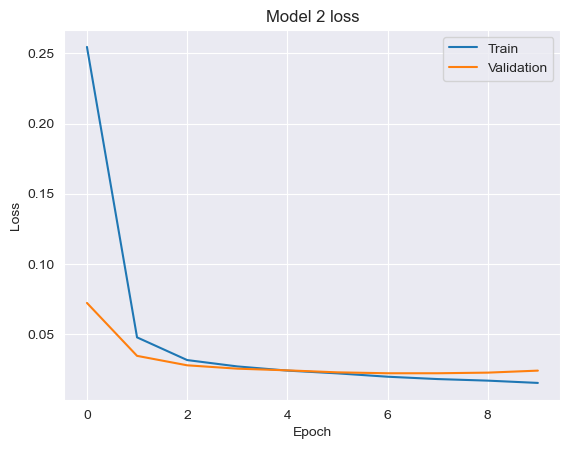

Training model 3
Epoch 1/10
90/90 [==============================] - 1s 8ms/step - loss: 0.2388 - accuracy: 0.8946 - val_loss: 0.0408 - val_accuracy: 0.9951
Epoch 2/10
90/90 [==============================] - 1s 6ms/step - loss: 0.0345 - accuracy: 0.9926 - val_loss: 0.0262 - val_accuracy: 0.9967
Epoch 3/10
90/90 [==============================] - 0s 4ms/step - loss: 0.0263 - accuracy: 0.9940 - val_loss: 0.0241 - val_accuracy: 0.9984
Epoch 4/10
90/90 [==============================] - 0s 4ms/step - loss: 0.0222 - accuracy: 0.9954 - val_loss: 0.0226 - val_accuracy: 0.9984
Epoch 5/10
90/90 [==============================] - 0s 4ms/step - loss: 0.0195 - accuracy: 0.9954 - val_loss: 0.0214 - val_accuracy: 0.9984
Epoch 6/10
90/90 [==============================] - 0s 3ms/step - loss: 0.0175 - accuracy: 0.9954 - val_loss: 0.0227 - val_accuracy: 0.9984
Epoch 7/10
90/90 [==============================] - 0s 3ms/step - loss: 0.0146 - accuracy: 0.9958 - val_loss: 0.0212 - val_accuracy: 0.9984
Epo

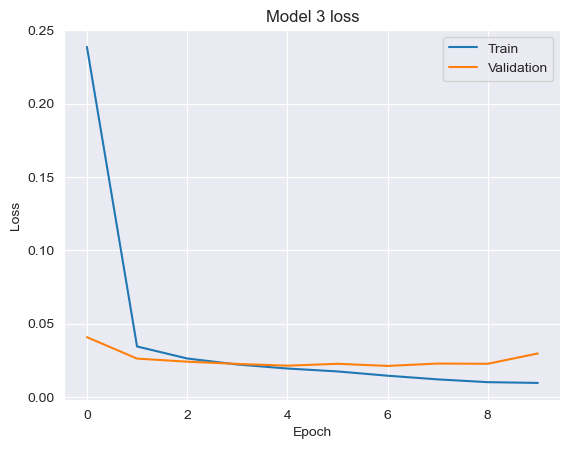

Training model 4
Epoch 1/10
90/90 [==============================] - 1s 6ms/step - loss: 0.4460 - accuracy: 0.8001 - val_loss: 0.1784 - val_accuracy: 0.9755
Epoch 2/10
90/90 [==============================] - 0s 4ms/step - loss: 0.1609 - accuracy: 0.9552 - val_loss: 0.0588 - val_accuracy: 0.9918
Epoch 3/10
90/90 [==============================] - 0s 5ms/step - loss: 0.0851 - accuracy: 0.9779 - val_loss: 0.0391 - val_accuracy: 0.9935
Epoch 4/10
90/90 [==============================] - 0s 4ms/step - loss: 0.0672 - accuracy: 0.9835 - val_loss: 0.0319 - val_accuracy: 0.9935
Epoch 5/10
90/90 [==============================] - 0s 4ms/step - loss: 0.0515 - accuracy: 0.9860 - val_loss: 0.0292 - val_accuracy: 0.9951
Epoch 6/10
90/90 [==============================] - 0s 4ms/step - loss: 0.0546 - accuracy: 0.9867 - val_loss: 0.0281 - val_accuracy: 0.9967
Epoch 7/10
90/90 [==============================] - 0s 4ms/step - loss: 0.0434 - accuracy: 0.9895 - val_loss: 0.0269 - val_accuracy: 0.9967
Epo

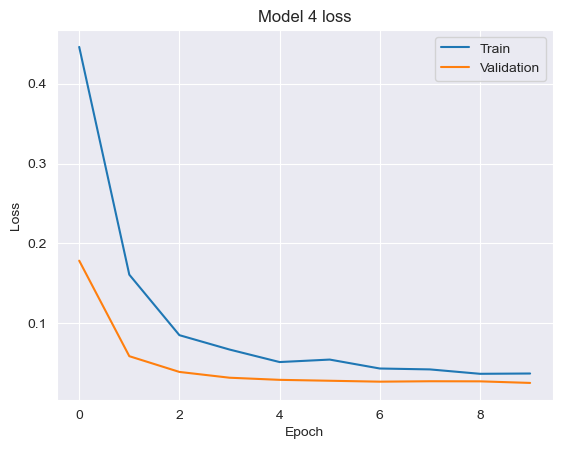

Training model 5
Epoch 1/10
90/90 [==============================] - 3s 9ms/step - loss: 0.6418 - accuracy: 0.6803 - val_loss: 0.2912 - val_accuracy: 0.9902
Epoch 2/10
90/90 [==============================] - 0s 5ms/step - loss: 0.3338 - accuracy: 0.8789 - val_loss: 0.1275 - val_accuracy: 0.9967
Epoch 3/10
90/90 [==============================] - 0s 5ms/step - loss: 0.2039 - accuracy: 0.9440 - val_loss: 0.0630 - val_accuracy: 0.9967
Epoch 4/10
90/90 [==============================] - 1s 6ms/step - loss: 0.1439 - accuracy: 0.9639 - val_loss: 0.0412 - val_accuracy: 0.9967
Epoch 5/10
90/90 [==============================] - 1s 6ms/step - loss: 0.1206 - accuracy: 0.9716 - val_loss: 0.0295 - val_accuracy: 0.9984
Epoch 6/10
90/90 [==============================] - 0s 5ms/step - loss: 0.0883 - accuracy: 0.9776 - val_loss: 0.0235 - val_accuracy: 0.9967
Epoch 7/10
90/90 [==============================] - 0s 5ms/step - loss: 0.0888 - accuracy: 0.9783 - val_loss: 0.0206 - val_accuracy: 0.9984
Epo

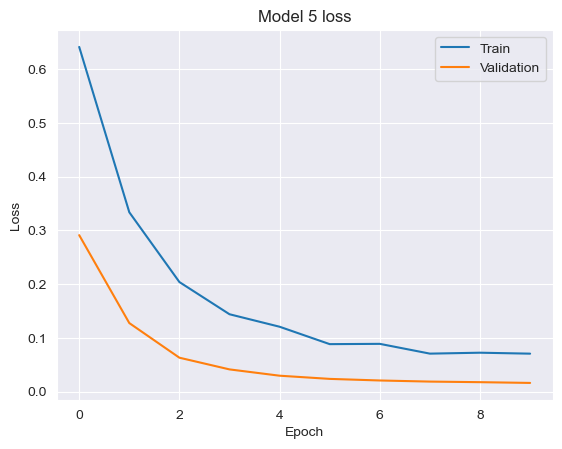

In [19]:
models = [model1, model2, model3, model4, model5]
best_validation_accuracy = 0.0

# Compile and train models
for i, model in enumerate(models, 1):
    print(f'Training model {i}')
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)
    
    # Retrieve the validation accuracy from history
    val_accuracy = history.history['val_accuracy'][-1]
    
    # Check if the current model has the highest validation accuracy
    if val_accuracy > best_validation_accuracy:
        best_model = model
        best_validation_accuracy = val_accuracy
        best_model_index = i

    # Plot training/validation loss
    plt.figure(i)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'Model {i} loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.show()

In [20]:
# Print the architecture of the best model
best_model.summary()

# Display the best model and its validation accuracy
print(f"The best model is: Model {best_model_index} with validation accuracy: {best_validation_accuracy}")

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                832       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2,945
Trainable params: 2,945
Non-trainable params: 0
_________________________________________________________________
The best model is: Model 4 with validation accuracy:

- Model 1 has a validation accuracy of 0.9983659982681274, it indicates that the model performs very well on the validation set. A high validation accuracy suggests that the model is able to make accurate predictions on unseen data, which is a desirable characteristic.

## (d) Model Tuning

In [21]:
# Create an empty DataFrame
results_table = pd.DataFrame(columns=['Activation Function', 'Learning Rate', 'Optimizer', 'Accuracy'])

# Define the hyperparameter values
activations = ['relu', 'sigmoid', 'tanh']
learning_rates = [0.1, 0.01, 0.001]
optimizers = ['adam', 'sgd', 'rmsprop']

# Set the number of combinations to evaluate
num_evaluations = 10

# Perform random search
for _ in range(num_evaluations):
    # Randomly select hyperparameters
    activation = random.choice(activations)
    learning_rate = random.choice(learning_rates)
    optimizer = random.choice(optimizers)

    # Create a new instance of the model
    model = tf.keras.Sequential([
        layers.Dense(64, activation=activation, input_shape=(X_train.shape[1],)),
        layers.Dense(32, activation=activation),
        layers.Dense(16, activation=activation),
        layers.Dense(1, activation='sigmoid')
    ])
    # Compile the model with the current hyperparameters
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

    # Evaluate the model on the test set
    _, accuracy = model.evaluate(X_test, y_test, verbose=0)

    # Record the results in the table
    results_table = pd.concat([results_table, pd.DataFrame([[activation, learning_rate, optimizer, accuracy]],
                                                           columns=['Activation Function', 'Learning Rate', 'Optimizer', 'Accuracy'])], ignore_index=True)
    
    # Print the results in a table
print(results_table)
print()

# Sort the results table by accuracy in descending order
results_table_sorted = results_table.sort_values(by='Accuracy', ascending=False)

# Retrieve the best hyperparameters (top row)
best_hyperparameters = results_table_sorted.iloc[0]

# Display the best hyperparameters
print("Best Hyperparameters:")
print("Activation Function:", best_hyperparameters['Activation Function'])
print("Learning Rate:", best_hyperparameters['Learning Rate'])
print("Optimizer:", best_hyperparameters['Optimizer'])
print("Accuracy:", best_hyperparameters['Accuracy'])

  Activation Function  Learning Rate Optimizer  Accuracy
0             sigmoid          0.001       sgd  0.845024
1                relu          0.001   rmsprop  0.995106
2                tanh          0.100       sgd  0.996737
3                tanh          0.100      adam  0.995106
4                tanh          0.010      adam  0.998369
5                relu          0.001      adam  0.996737
6                tanh          0.100       sgd  0.996737
7                relu          0.010       sgd  0.990212
8             sigmoid          0.010      adam  0.993475
9             sigmoid          0.010      adam  0.995106

Best Hyperparameters:
Activation Function: tanh
Learning Rate: 0.01
Optimizer: adam
Accuracy: 0.9983686804771423


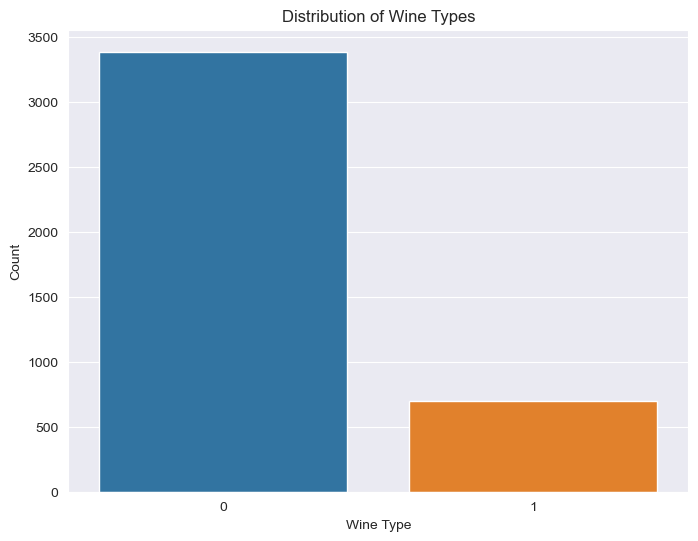

In [22]:
# Plot histogram of target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='type', data=wine)
plt.title('Distribution of Wine Types')
plt.xlabel('Wine Type')
plt.ylabel('Count')
plt.show()

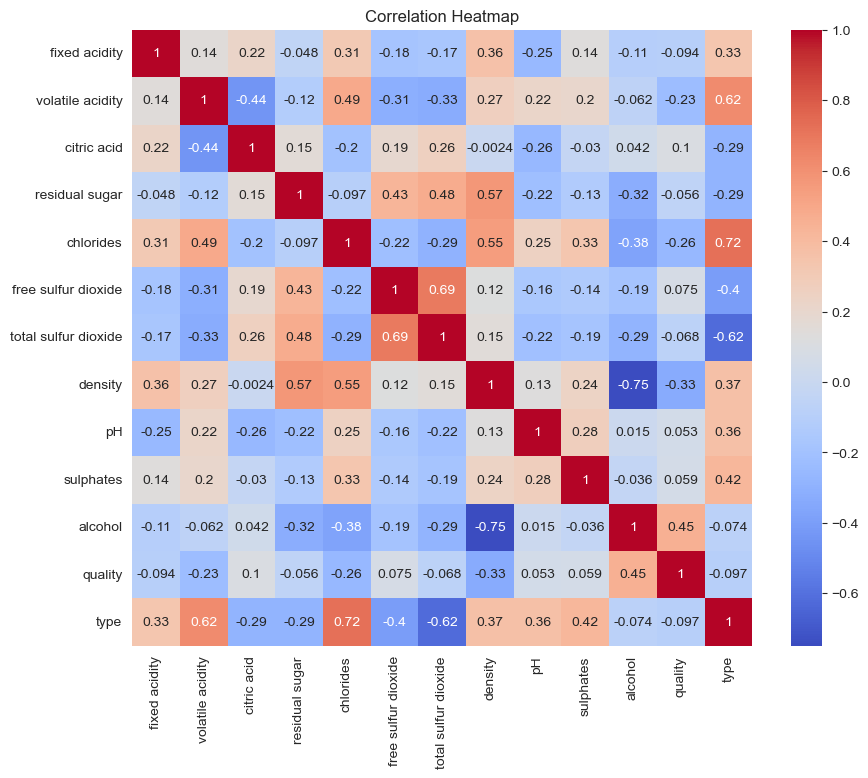

In [23]:
# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(wine.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## (e) Model evaluation
- Displaying confusion matrix and ROC curve

In [24]:
# Predict the test set results
y_pred = best_model.predict(X_test)
y_pred = (y_pred > 0.5)

20/20 [==============================] - 0s 2ms/step


In [25]:
# Compute and print the performance metrics
print("Test accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_pred))

Test accuracy: 0.9967373572593801
Precision: 1.0
Recall: 0.9789473684210527
F1 Score: 0.9893617021276596
AUC: 0.9894736842105263


In [26]:
# Compute and print the performance metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("\n")
print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[518   0]
 [  2  93]]


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       518
           1       1.00      0.98      0.99        95

    accuracy                           1.00       613
   macro avg       1.00      0.99      0.99       613
weighted avg       1.00      1.00      1.00       613



Accuracy Score:
0.9967373572593801


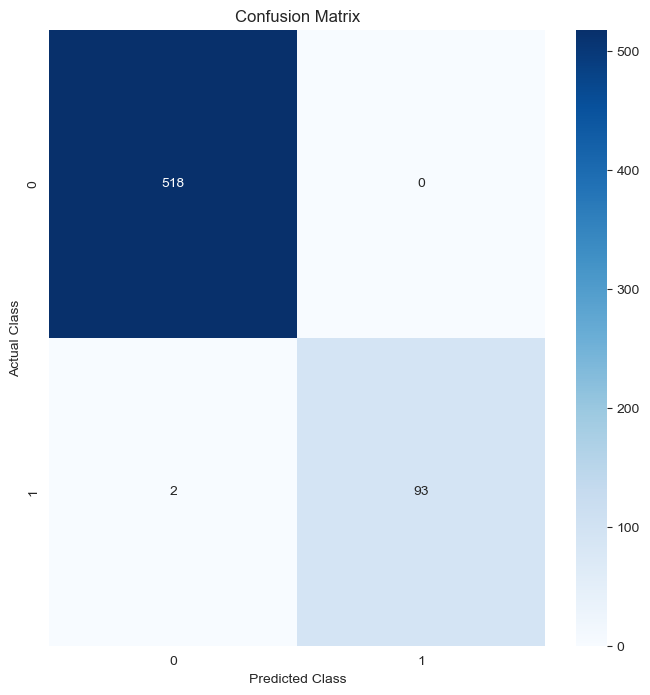

In [27]:
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel("Predicted Class")
plt.ylabel('Actual Class')
plt.show()

In [28]:
# Calculate the probabilities of the predictions
y_test_prob = best_model.predict(X_test)

20/20 [==============================] - 0s 1ms/step


In [29]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)

In [30]:
# Calculate AUC score
auc_score = roc_auc_score(y_test, y_test_prob)

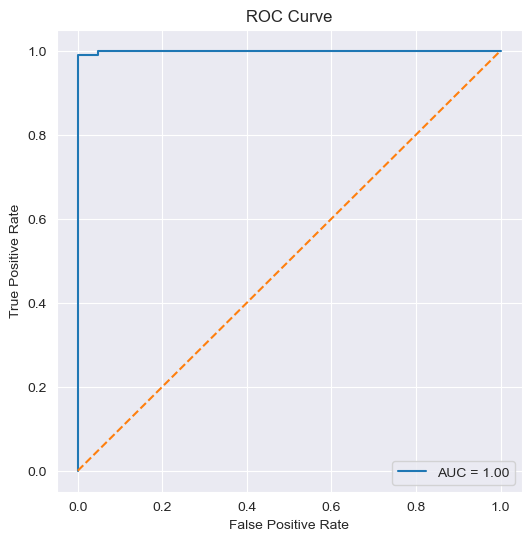

In [31]:
# Plot ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()